[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the data

In [29]:
athlete_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/athlete_events.csv')
df = athlete_dataframe.copy()
df.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Don't forget to drop duplicates first

In [31]:
# check duplicate
df.duplicated().sum()

1385

In [32]:
df.drop_duplicates(inplace=  True  )

In [33]:
# check duplicate again
df.duplicated().sum()

0

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [34]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [35]:
df['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [36]:
len(df['City'].unique())

42

In [37]:
df['City'].unique().tolist()

['Barcelona',
 'London',
 'Antwerpen',
 'Paris',
 'Calgary',
 'Albertville',
 'Lillehammer',
 'Los Angeles',
 'Salt Lake City',
 'Helsinki',
 'Lake Placid',
 'Sydney',
 'Atlanta',
 'Stockholm',
 'Sochi',
 'Nagano',
 'Torino',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Squaw Valley',
 'Innsbruck',
 'Sarajevo',
 'Mexico City',
 'Munich',
 'Seoul',
 'Berlin',
 'Oslo',
 "Cortina d'Ampezzo",
 'Melbourne',
 'Roma',
 'Amsterdam',
 'Montreal',
 'Moskva',
 'Tokyo',
 'Vancouver',
 'Grenoble',
 'Sapporo',
 'Chamonix',
 'St. Louis',
 'Sankt Moritz',
 'Garmisch-Partenkirchen']

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [38]:
df_year = df.groupby('Year')

In [39]:
df_year['ID'].nunique()

Year
1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3565
1928     3703
1932     2174
1936     5142
1948     5068
1952     5622
1956     4167
1960     6017
1964     6230
1968     6717
1972     8122
1976     7200
1980     6330
1984     8067
1988     9873
1992    11183
1994     1738
1996    10339
1998     2179
2000    10647
2002     2399
2004    10557
2006     2494
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [40]:
df[df['ID'] == df['ID'].value_counts().idxmax()][['ID','Name']].iloc[0]

ID                        106296
Name    Heikki Ilmari Savolainen
Name: 211668, dtype: object

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
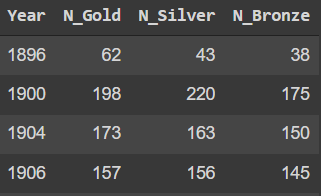

In [41]:
df_medal = df.groupby('Year')['Medal'].value_counts()
df_medal

Year  Medal 
1896  Gold       62
      Silver     43
      Bronze     38
1900  Silver    220
      Gold      198
               ... 
2014  Bronze    198
      Silver    197
2016  Bronze    703
      Gold      665
      Silver    655
Name: Medal, Length: 105, dtype: int64

In [42]:
medal_rename = df_medal.unstack(level=-1)
medal_rename.columns = ['N_Bronze','N_Gold','N_Silver']
medal_rename



,N_Bronze,N_Gold,N_Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156
1908,256,294,281
1912,300,326,315
1920,367,493,448
1924,311,332,319
1928,281,275,267


# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [43]:
winners = df[df['Medal']=='Gold']
df_winners = winners.groupby('City')['ID'].count()
df_winners

City
Albertville                104
Amsterdam                  245
Antwerpen                  493
Athina                     883
Atlanta                    608
Barcelona                  559
Beijing                    671
Berlin                     312
Calgary                     87
Chamonix                    55
Cortina d'Ampezzo           51
Garmisch-Partenkirchen      36
Grenoble                    66
Helsinki                   306
Innsbruck                  131
Lake Placid                104
Lillehammer                110
London                    1215
Los Angeles                726
Melbourne                  290
Mexico City                359
Montreal                   438
Moskva                     457
Munich                     404
Nagano                     145
Oslo                        45
Paris                      475
Rio de Janeiro             665
Roma                       309
Salt Lake City             162
Sankt Moritz                71
Sapporo                     70
Sar

<Axes: ylabel='City'>

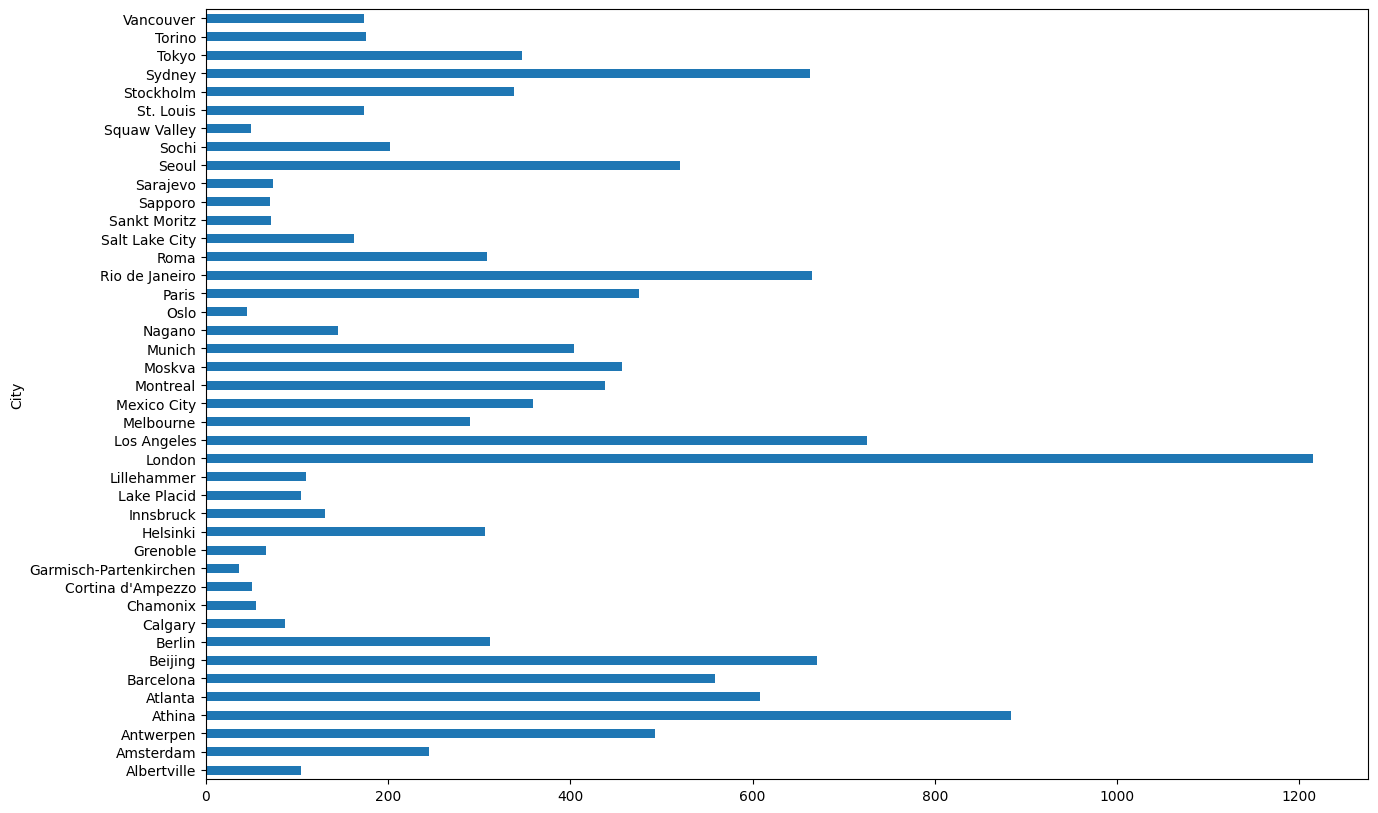

In [44]:
plt.figure(figsize=(15,10))
df_winners.plot(kind='barh')

### Find the total missing data for each year?

In [45]:
df['missing_each_row'] = df.isnull().sum(1)
missing = df.groupby('Year')['missing_each_row'].count()
missing

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: missing_each_row, dtype: int64

<Axes: ylabel='Year'>

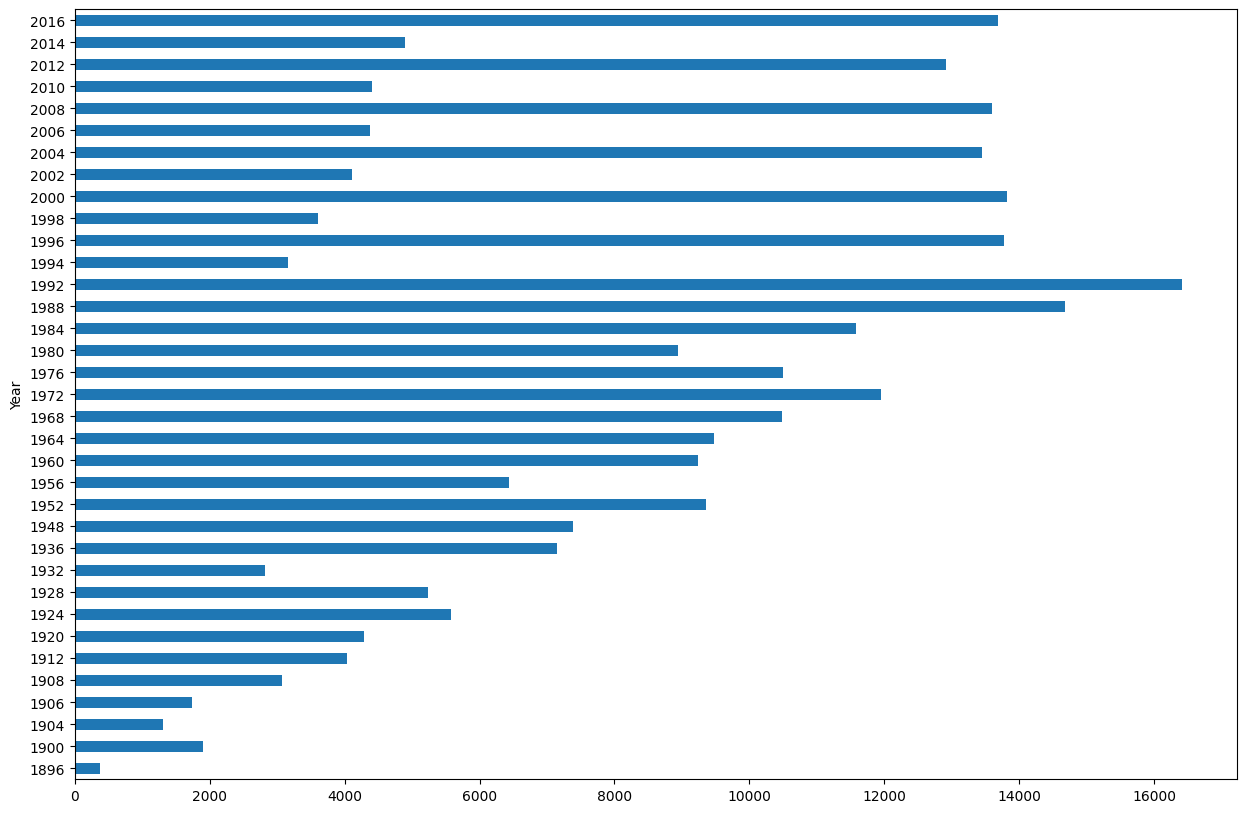

In [46]:
plt.figure(figsize=(15,10))
missing.plot(kind='barh')

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [47]:
athletes = df.groupby(['Year','Season'])['ID'].nunique()
athletes

Year  Season
1896  Summer      176
1900  Summer     1224
1904  Summer      650
1906  Summer      841
1908  Summer     2024
1912  Summer     2409
1920  Summer     2676
1924  Summer     3256
      Winter      313
1928  Summer     3247
      Winter      461
1932  Summer     1922
      Winter      252
1936  Summer     4484
      Winter      668
1948  Summer     4402
      Winter      668
1952  Summer     4932
      Winter      694
1956  Summer     3347
      Winter      821
1960  Summer     5352
      Winter      665
1964  Summer     5137
      Winter     1094
1968  Summer     5558
      Winter     1160
1972  Summer     7114
      Winter     1008
1976  Summer     6073
      Winter     1128
1980  Summer     5259
      Winter     1071
1984  Summer     6798
      Winter     1273
1988  Summer     8454
      Winter     1425
1992  Summer     9386
      Winter     1801
1994  Winter     1738
1996  Summer    10339
1998  Winter     2179
2000  Summer    10647
2002  Winter     2399
2004  Summer    105

<Axes: xlabel='Year'>

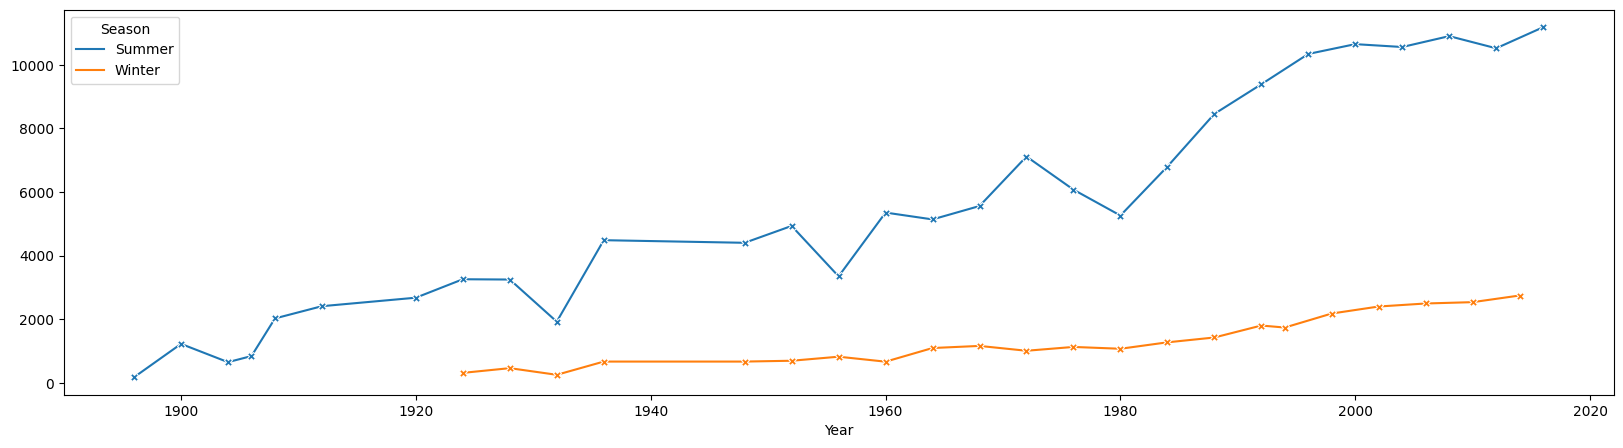

In [48]:
plt.figure(figsize=(20,5))
sb.lineplot(x=athletes.index.get_level_values('Year'), y=athletes.values, hue=athletes.index.get_level_values('Season'), marker='X')

# <font color='Brown'>**Other Details With Data Analysis And Exploratory Data Analysis (EDA)**</fond>


## First We Will Make a Copy Of Our DataFrame If We Manipulate It

In [49]:
df_athlete = df.copy()

# First Checks

# info
# describe
# check for duplicate
# check missing values

In [50]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                269731 non-null  int64  
 1   Name              269731 non-null  object 
 2   Sex               269731 non-null  object 
 3   Age               260416 non-null  float64
 4   Height            210917 non-null  float64
 5   Weight            208204 non-null  float64
 6   Team              269731 non-null  object 
 7   NOC               269731 non-null  object 
 8   Games             269731 non-null  object 
 9   Year              269731 non-null  int64  
 10  Season            269731 non-null  object 
 11  City              269731 non-null  object 
 12  Sport             269731 non-null  object 
 13  Event             269731 non-null  object 
 14  Medal             39772 non-null   object 
 15  missing_each_row  269731 non-null  int64  
dtypes: float64(3), int64

## Here We Should Notice That Describe Method For Only Numeric Columns And We Will Look For Only Age & Height & Weight
##<font color='green'>**The Insight : There Is No Skewness Depends On Previous Three Columns**</font>

In [51]:
df_athlete.describe()

,ID,Age,Height,Weight,Year,missing_each_row
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073,1.333236
std,39026.253843,6.163869,10.518507,14.349027,29.752055,0.964020
min,1.000000,10.000000,127.000000,25.000000,1896.000000,0.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000,1.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000,1.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000,1.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,4.000000


In [52]:
df_athlete.duplicated().sum()

0

In [53]:
df_athlete[df_athlete.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,missing_each_row


In [54]:
df_athlete.drop_duplicates(inplace=True)

In [55]:
df_athlete.duplicated().sum()

0

## Here There Are Three Columns Contain Missing Values Which Are :  Age, Height, Weight, Medal

In [56]:
df_athlete.isnull().sum()

ID                       0
Name                     0
Sex                      0
Age                   9315
Height               58814
Weight               61527
Team                     0
NOC                      0
Games                    0
Year                     0
Season                   0
City                     0
Sport                    0
Event                    0
Medal               229959
missing_each_row         0
dtype: int64

## Then We Will split categorical and numarical Features

In [57]:
df_athlete_numerical_features = df_athlete.select_dtypes(include='number')
df_athlete_numerical_features.columns

Index(['ID', 'Age', 'Height', 'Weight', 'Year', 'missing_each_row'], dtype='object')

In [58]:
df_athlete_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                269731 non-null  int64  
 1   Age               260416 non-null  float64
 2   Height            210917 non-null  float64
 3   Weight            208204 non-null  float64
 4   Year              269731 non-null  int64  
 5   missing_each_row  269731 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 14.4 MB


In [59]:
df_athlete_categorical_features = df_athlete.select_dtypes(include='object')
df_athlete_categorical_features.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [60]:
df_athlete_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    269731 non-null  object
 1   Sex     269731 non-null  object
 2   Team    269731 non-null  object
 3   NOC     269731 non-null  object
 4   Games   269731 non-null  object
 5   Season  269731 non-null  object
 6   City    269731 non-null  object
 7   Sport   269731 non-null  object
 8   Event   269731 non-null  object
 9   Medal   39772 non-null   object
dtypes: object(10)
memory usage: 22.6+ MB


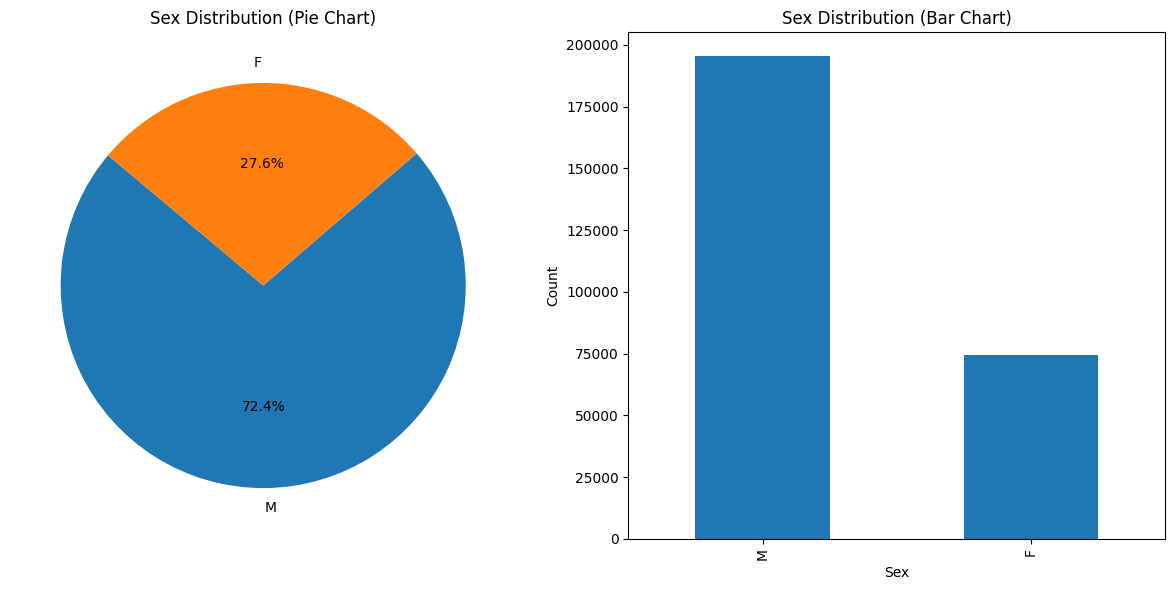

In [61]:
import matplotlib.pyplot as plt
sex_counts = df_athlete_categorical_features['Sex'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Sex Distribution (Pie Chart)')

# Bar chart
sex_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Sex Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

##<font color='green'>**Number Of Males Greater Than Females**</font>

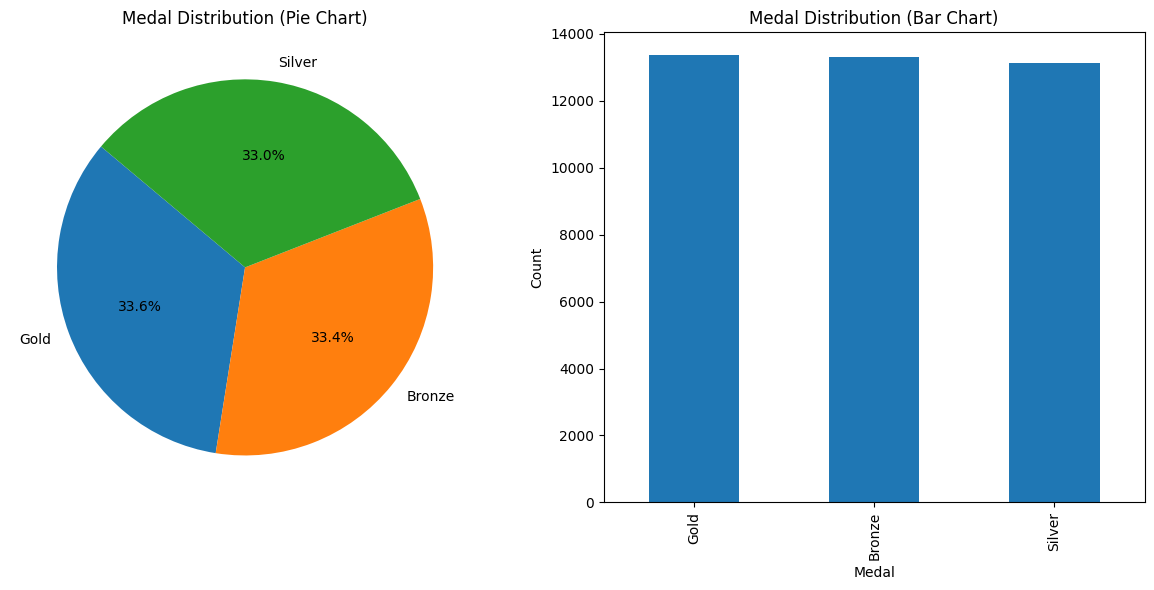

In [62]:
medal_counts = df_athlete_categorical_features['Medal'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Medal Distribution (Pie Chart)')

# Bar chart
medal_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Medal Distribution (Bar Chart)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Medal')

plt.tight_layout()
plt.show()

##<font color='green'>**Types Of Medals Are nearly Equal**</font>

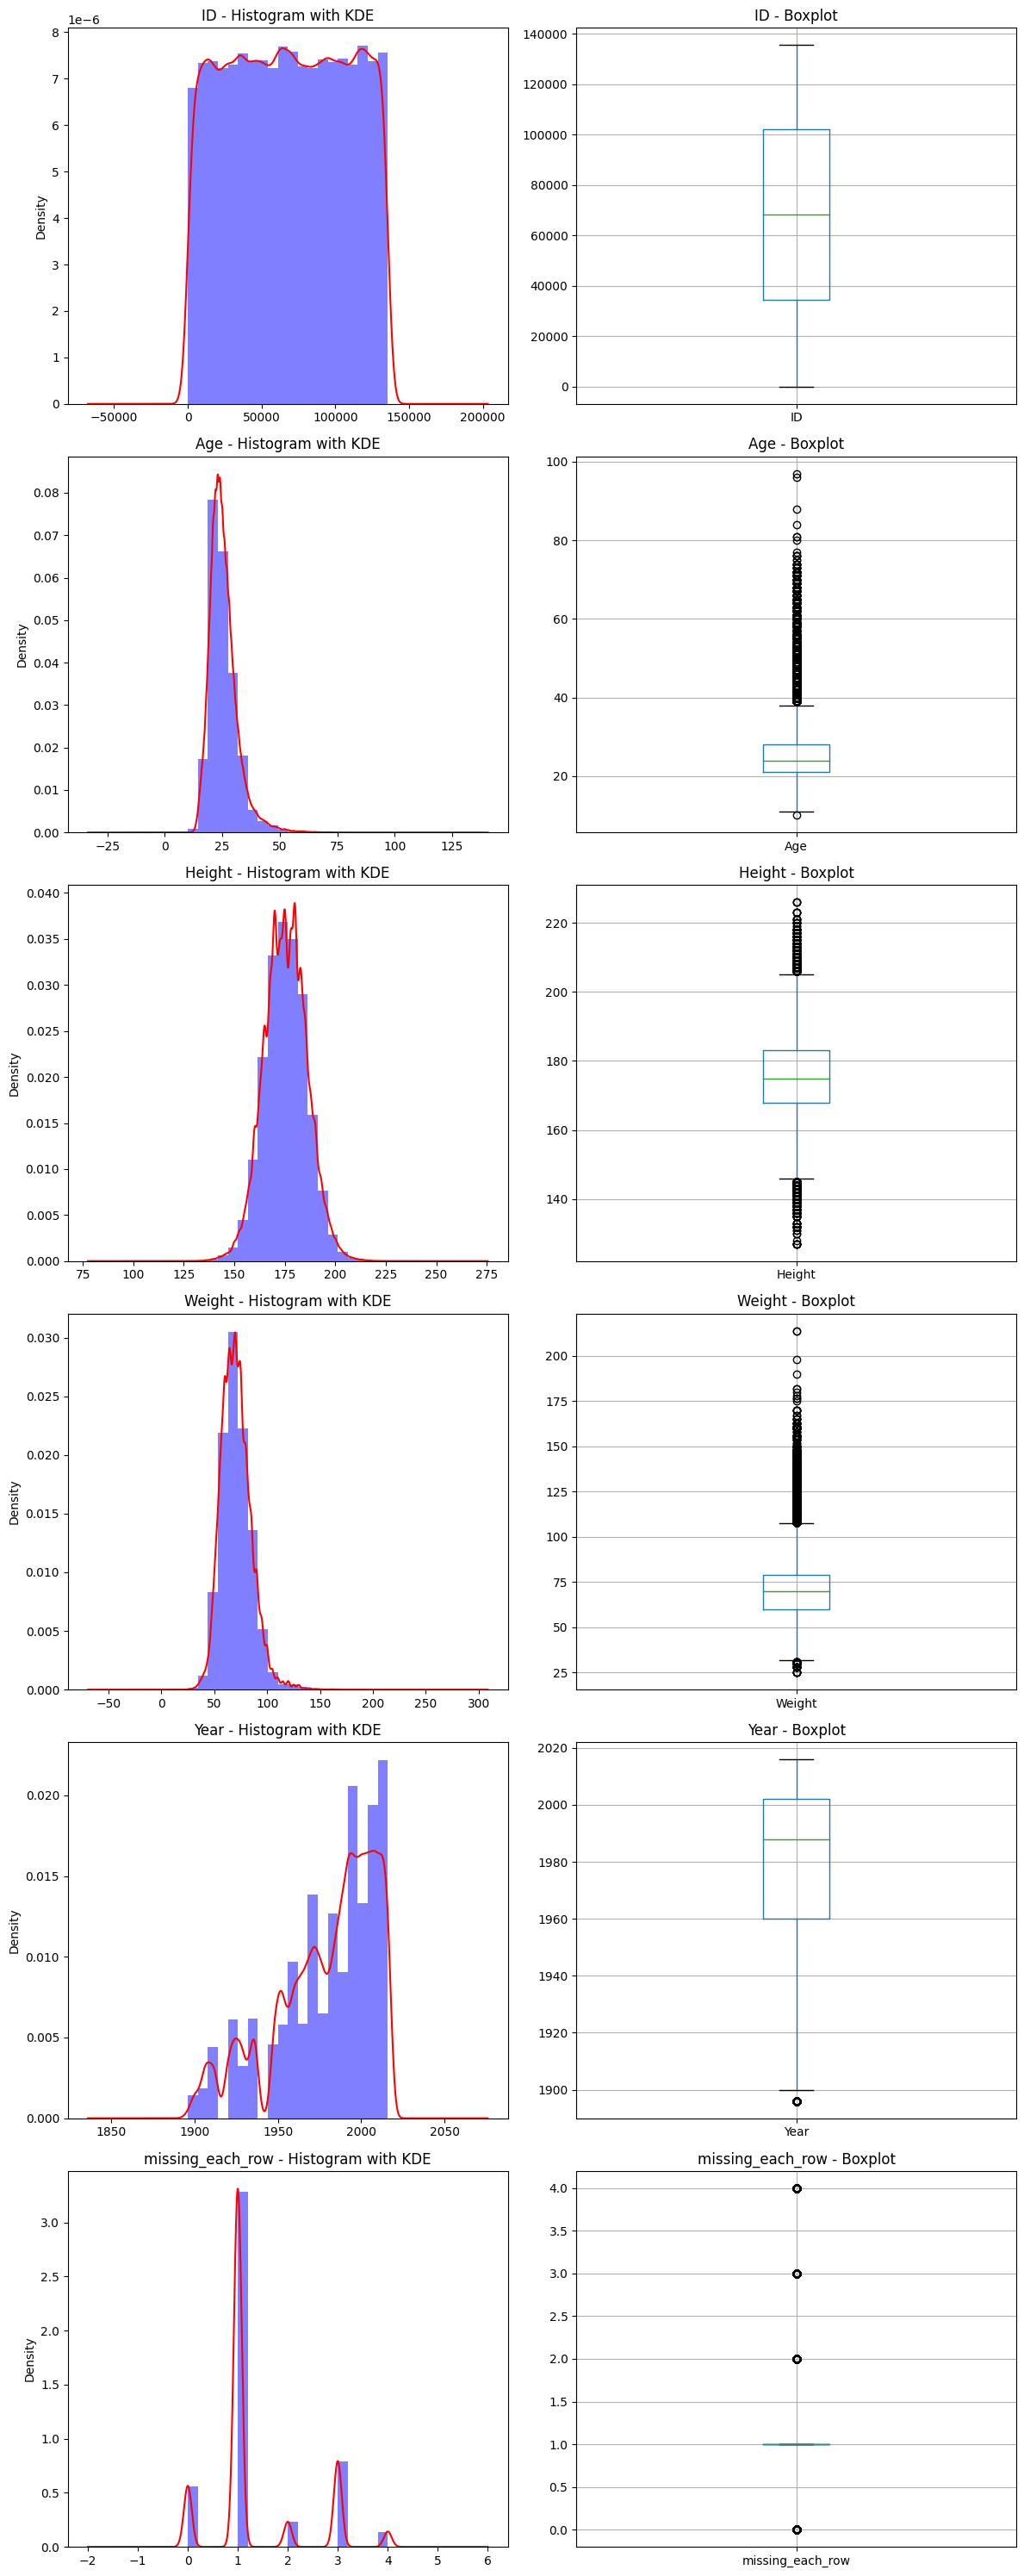

In [63]:
import numpy as np

# Sample data creation
# np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_athlete_numerical_features.columns), 2, figsize=(12, 5 * len(df_athlete_numerical_features.columns)))

for i, col in enumerate(df_athlete_numerical_features.columns):
    # Histogram with KDE
    df_athlete_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_athlete_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_athlete_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

##<font color='green'>**In Previous Plots We Care About Age, Height, Weight And We Notice The Distribution With Outliers**</font>

##<font color='darker'>**After That We Will Compute The Correlation Between Numeric Features And Plot The Heatmap Between Them**</font>

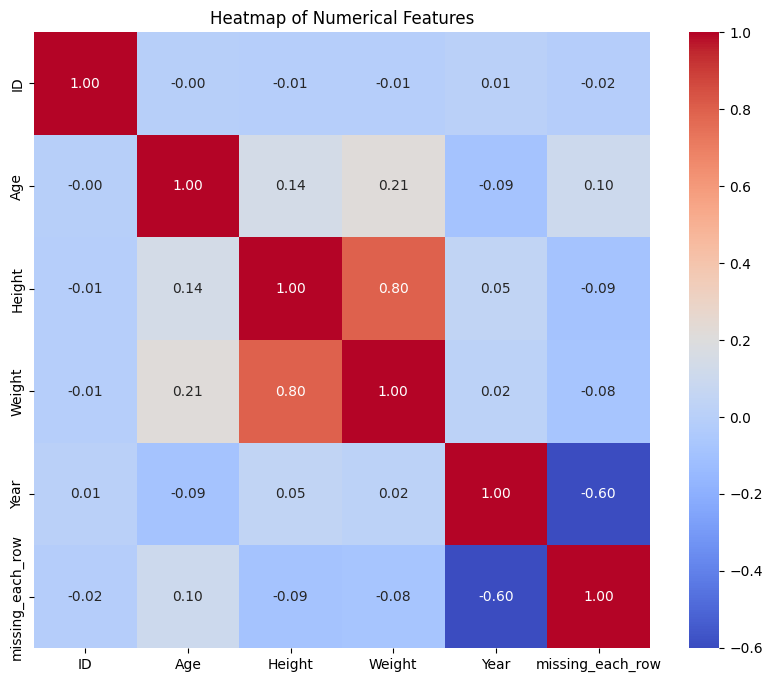

In [64]:
corr = df_athlete_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

##<font color='green'>**In Previous Heatmap We Notice That The Relation Between Height And Weight IS High Also Between Age,Weight IS low But Bigger Than Age, Height**</font>

## Moving To Fill Missing Numeric Values ▶ Here We Will Use Fill By Median Because There Are Outliers

In [65]:
# For median:
df_athlete_numerical_features.fillna(df_athlete.median(numeric_only=True).round(1), inplace=True)
df_athlete_numerical_features.isnull().sum()

ID                  0
Age                 0
Height              0
Weight              0
Year                0
missing_each_row    0
dtype: int64

## Moving To Fill Missing Categorical Values ▶ Here We Will Use Fill By Mode

In [66]:
df_athlete_categorical_features['Medal'].fillna(df_athlete_categorical_features['Medal'].mode()[0], inplace=True)
df_athlete_categorical_features.isnull().sum()

Name      0
Sex       0
Team      0
NOC       0
Games     0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

##Dealing with the categorical Data
 Label encoding


In [67]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.
for i in range(df_athlete_categorical_features.shape[1]):
  df_athlete_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_athlete_categorical_features.iloc[:,i])


<ipython-input-67-a04f93eacab8>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_athlete_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_athlete_categorical_features.iloc[:,i])
<ipython-input-67-a04f93eacab8>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_athlete_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_athlete_categorical_features.iloc[:,i])
<ipython-input-67-a04f93eacab8>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of

In [68]:
df_athlete_categorical_features.head(4)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
0,7,1,198,41,37,0,5,8,159,1
1,8,1,198,41,48,0,17,32,397,1
2,44094,1,273,55,6,0,2,24,348,1
3,29258,1,278,55,1,0,26,61,709,1


##<font color='darker'>**After That We Can Choose More Specific and More Meaning features from Numeric And Categorical Then We Concat Them And After That We Use MinMAxScaler Because We Have Outliers After Drop The target We Need Then We Apply Models**</font>
##<font color='green'>**Thanks A Lot 🍻**</font>